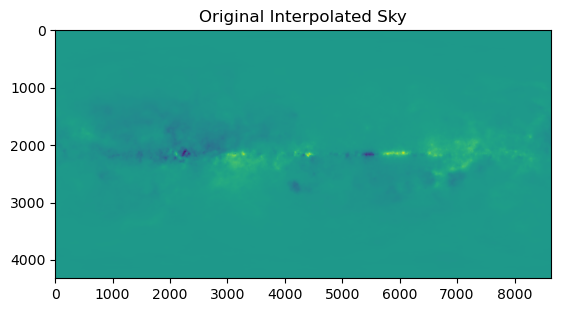

(4320, 8640)


In [26]:
import scipy.fft
from astropy.io import fits
import matplotlib.pyplot as plt
import numpy as np

hdu5 = fits.open("../data_preprocessed/Hutschenreuter_2020_faraday_sky_wff_mean.fits")[0]

image = hdu5.data

plt.imshow(image)
plt.title("Original Interpolated Sky")
plt.show()

print(image.shape)

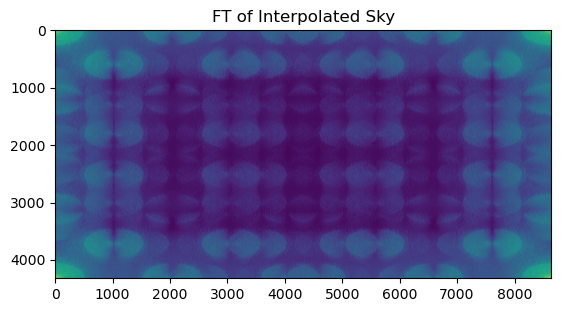

[ 0.          0.00023148  0.00046296 ... -0.00069444 -0.00046296
 -0.00023148] [ 0.          0.00011574  0.00023148 ... -0.00034722 -0.00023148
 -0.00011574] (4320, 8640)


In [27]:
ft = scipy.fft.fft2(image)
fy = scipy.fft.fftfreq(image.shape[0])
fx = scipy.fft.fftfreq(image.shape[1])

plt.imshow(np.log(np.abs(ft.real)+1))
plt.title("FT of Interpolated Sky")
plt.show()

print(fy, fx, ft.shape)

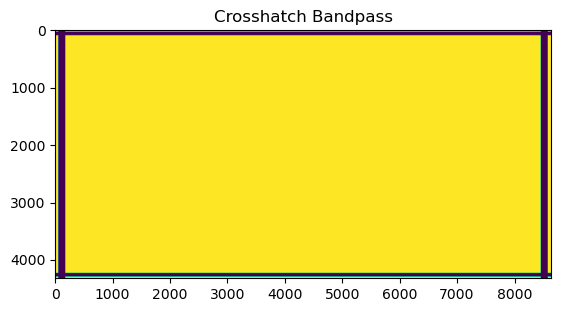

In [28]:
def convert_size_to_frequency(theta_hvc, l_shape=8640):
    R = l_shape / 360
    f_hvc = 1/(2*theta_hvc*R)
    return f_hvc

def convert_frequency_to_pixel(f_range, fftfreq):
    fftfreq_range = list(map(lambda x: f_range[0] < x < f_range[1], fftfreq))
    return fftfreq_range

def punch_crosshatch(base, x_mask, y_mask):
    for y in range(len(base)):
        for x in range(len(base[y])):
            if x_mask[x] or y_mask[y]:
                    base[y][x] = 0
    
    return base


hvc_range = (1, np.pi)
crosshatch_space = ((ft.real * 0) + 1)
hvc_f_range_pos = tuple(map(convert_size_to_frequency, hvc_range))[::-1]
hvc_f_range_neg = tuple(map(lambda x: - x, map(convert_size_to_frequency, hvc_range)))


x_range = convert_frequency_to_pixel(hvc_f_range_pos, fx)
y_range = convert_frequency_to_pixel(hvc_f_range_pos, fy)

crosshatch_space = punch_crosshatch(crosshatch_space, x_range, y_range)

x_range = convert_frequency_to_pixel(hvc_f_range_neg, fx)
y_range = convert_frequency_to_pixel(hvc_f_range_neg, fy)

crosshatch_space = punch_crosshatch(crosshatch_space, x_range, y_range)

plt.imshow(crosshatch_space)
plt.title("Crosshatch Bandpass")
plt.show()

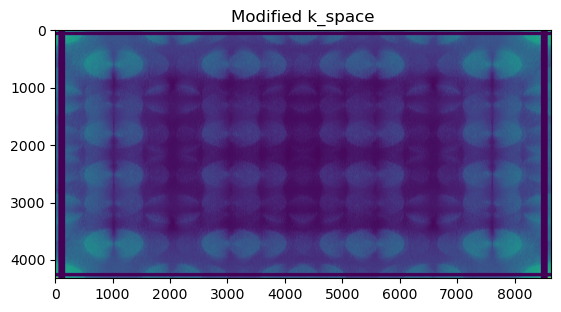

In [29]:
k_space_modified = ft * crosshatch_space

plt.title("Modified k_space")
plt.imshow(np.log(np.abs(k_space_modified.real)+1))
plt.show()

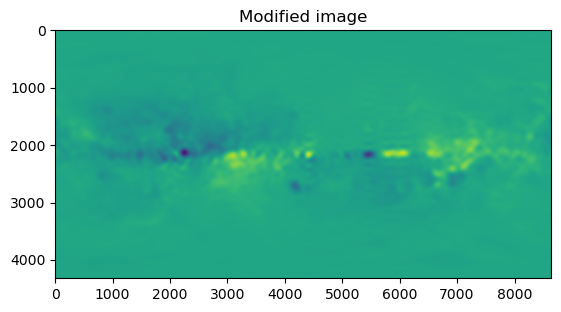

In [30]:
new_image = scipy.fft.ifft2(k_space_modified).real

plt.imshow(new_image)
plt.title("Modified image")
plt.show()